In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Задача 1.


### Проверить гипотезу о том, что зарплаты у людей старше 35 и младше 35 лет отличаются статистически значимо, при уровне значимости 5% (alfa = 0.05). (Сравнение центров распределений)

Сделать выводы

In [17]:
data = pd.read_csv("C:/Users/Lenovo/Pictures/Salary_Data.csv")
data.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


In [18]:
data=data.dropna()
data.reset_index()
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


<Axes: xlabel='Salary', ylabel='Count'>

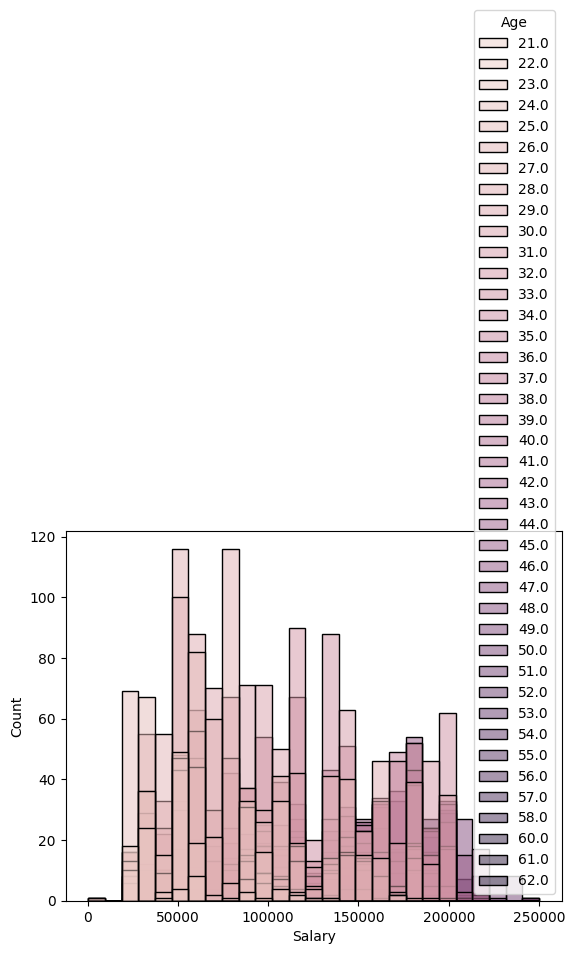

In [19]:
sns.histplot(x=data['Salary'], hue=data['Age'])

<Axes: xlabel='Salary', ylabel='Count'>

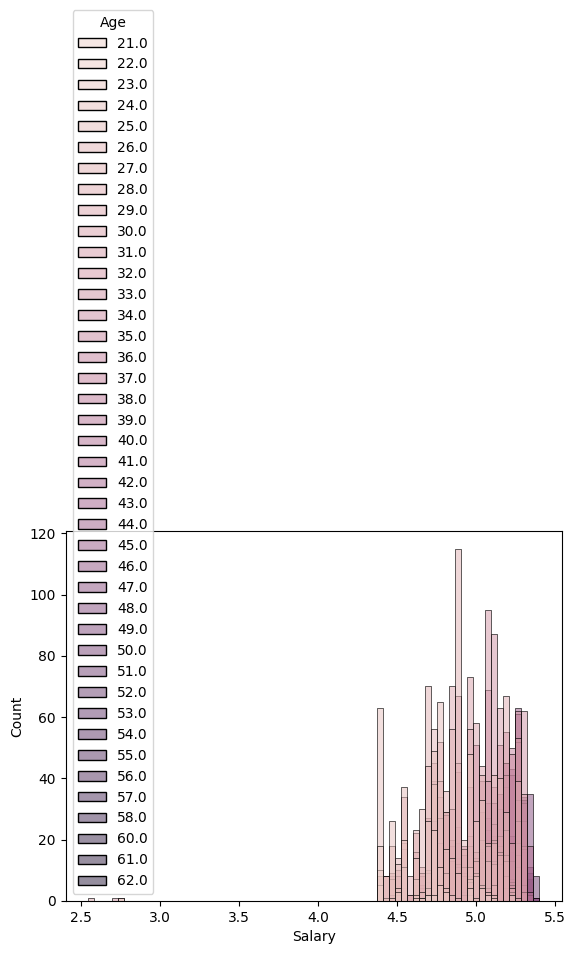

In [20]:
sns.histplot(x=np.log10(data['Salary']), hue=data['Age'])

<Axes: xlabel='Salary', ylabel='Count'>

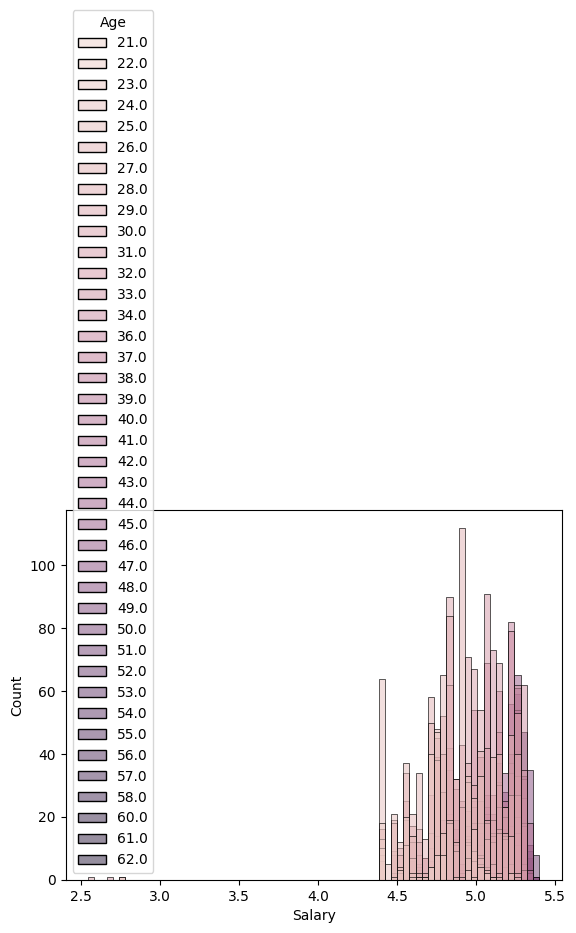

In [21]:
d_new = data[(data['Age']<35) | (data['Age']>35) & (data['Years of Experience'])]
# | - or или
sns.histplot(x=np.log10(d_new['Salary']), hue=d_new['Age'])

In [22]:
x = np.log10(d_new['Salary'][d_new['Age']<35])
y = np.log10(d_new['Salary'][d_new['Age']>35])

In [23]:
stats.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=1225261.0, pvalue=0.0)

In [24]:
stats.fligner(x, y) #  проверяем равенство средних

FlignerResult(statistic=1216.8995104519458, pvalue=1.2959413206822215e-266)

In [25]:
stats.ttest_ind(x, y, equal_var=True) # equal_var=True - потому что доказали равенство дисперсий

# ttest_rel - критерий t Стьюдента для парных выборок (релевантных)

TtestResult(statistic=-53.91573755866947, pvalue=0.0, df=6496.0)

##### Вывод: 0  гипотеза отвергнута  при pvalue=0.0 < a=0.05. 
#####Гипотеза отвергнута,  при значении опыта  10 , pvalue=4.554457318897624e-10< a=0.05.   есть люди моложе но с более высокой зарплатой и меньшим опытом. Т.е. зарплата зависит и от возраста и от опыта.

# Задача 2.
### Сайт претерпел изменения дизайна. 
Менеджер рассчитывает, что изменения увеличили конверсию.
Изменился ли показатель конверсии статистически значимо при уровне значимости 5% (alfa = 0.05)?
Данные:
кол-во посетителей сайта до изменений: 1000 чел, из них приобрели товар 750
кол-во посетителей сайта после изменений: 1000 чел. , из них приобрели товар 830


In [12]:
data = pd.DataFrame([[1000, 750], [1000, 850]],
                   index=['before', 'after'],
                   columns=['quantity', 'bought'])
data

,quantity,bought
before,1000,750
after,1000,850


In [3]:
stats.chi2_contingency(data)

Chi2ContingencyResult(statistic=3.350932818532831, pvalue=0.06716694103151112, dof=1, expected_freq=array([[ 972.22222222,  777.77777778],
       [1027.77777778,  822.22222222]]))

In [4]:
#pvalue=0.06716694103151112 > a=0.05,  значит гипотеза верна(Менеджер рассчитывает, что изменения увеличили конверсию.)